## Kajal Tiwary

In [45]:
## Import all necessary libraries 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import PIL
import torchvision
import numpy as np
import pandas as pd
import tqdm
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import seaborn as sns
from matplotlib import RcParams
from torchvision.transforms.transforms import CenterCrop
from sklearn.model_selection import train_test_split
from torchvision.transforms.transforms import CenterCrop
from sklearn.metrics import confusion_matrix

## Set the working directory 
## os.chdir('/Users/kajaltiwary/ANLY677_FinalProject/')

In [46]:
## Read in accuracy values dataframe 
accuracy_df = pd.read_csv('Project3_Input_Files/All_Models_Accuracy_Values.csv')
accuracy_df.head()

,Architecture,Top-1 accuracy (%),Top-5 accuracy (%)
0,VGG 13,27.3,50.0
1,VGG 16,18.2,50.0
2,VGG 19,27.3,54.5


In [47]:
## Convert values to list for plot customization 
arch = accuracy_df['Architecture'].tolist()
top_1 = accuracy_df['Top-1 accuracy (%)'].tolist()
top_5 = accuracy_df['Top-5 accuracy (%)'].tolist()
width = 0.2
## NOTE: This will need to change to the number of models in the image 
x = np.arange(3)

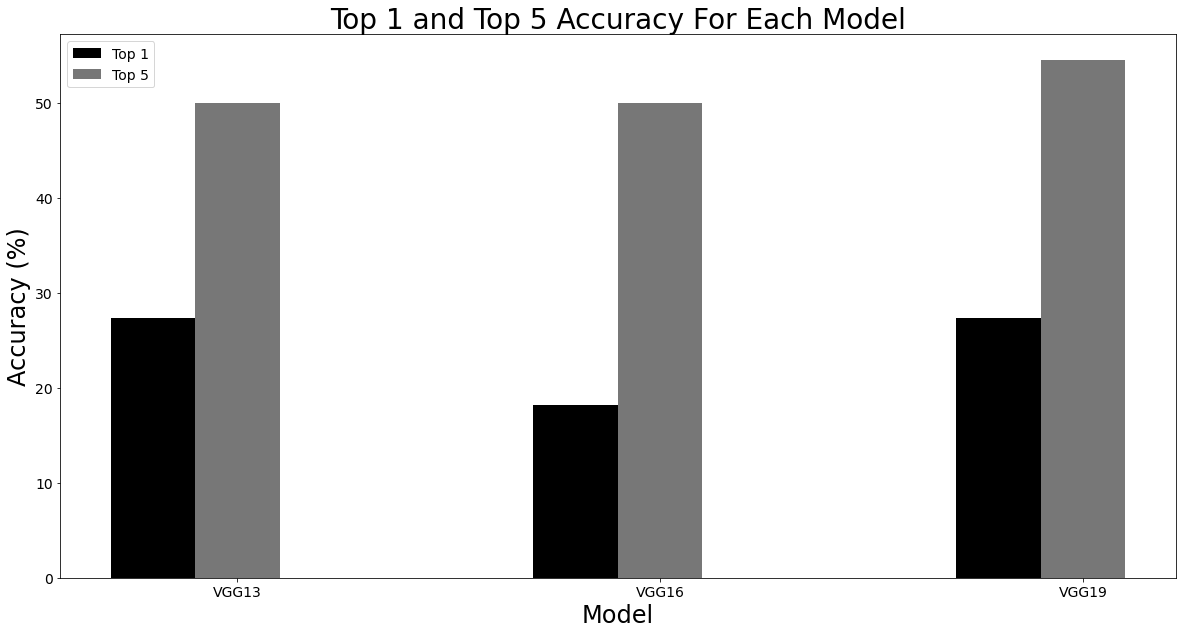

In [48]:
## Plot the accuracy for each architecture 
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x-0.2, top_1, width, color='#000000')
plt.bar(x, top_5, width, color='#777777')

## NOTE: This will need to change to indicate the model names 
plt.xticks(x, ['VGG13','VGG16', 'VGG19'], fontsize=14)

## Continue plotting graph 
plt.yticks(fontsize=14)
plt.xlabel("Model", fontsize=24)
plt.ylabel("Accuracy (%)", fontsize=24)
plt.legend(["Top 1", "Top 5"],loc=2, prop={'size': 14})
plt.title("Top 1 and Top 5 Accuracy For Each Model", fontsize=28)
plt.savefig('Project3_Final_Graphs/accuracy_all.jpg', dpi=300, bbox_inches='tight') 
plt.savefig('Project3_Final_Graphs/accuracy_all.pdf', dpi=300, bbox_inches='tight') 

In [49]:
## Read in all of the loss files for each model 
vgg19_df = pd.read_csv('Project3_Input_Files/VGG19_Loss.csv')
vgg16_df = pd.read_csv('Project3_Input_Files/VGG16_Loss.csv')

## Add a new column to each dataframe for the model type 
vgg16_df["Model"] = "VGG16"
vgg19_df["Model"] = "VGG19"

## Concatenate all of the model dataframes together 
concatenated = pd.concat([vgg16_df, vgg19_df])
concatenated.head(20)

,Unnamed: 0,EPOCH,Train_Loss,Test_Loss,Model
0,0,1,5.448443,5.136746,VGG16
1,1,2,4.809203,4.611912,VGG16
2,2,3,3.848167,3.795561,VGG16
3,3,4,2.483795,3.689024,VGG16
4,4,5,1.559339,5.379971,VGG16
5,5,6,1.018327,5.418684,VGG16
6,6,7,0.811896,4.890605,VGG16
7,7,8,0.401834,5.125380,VGG16
8,8,9,0.338314,5.178362,VGG16
9,9,10,0.247854,6.250158,VGG16


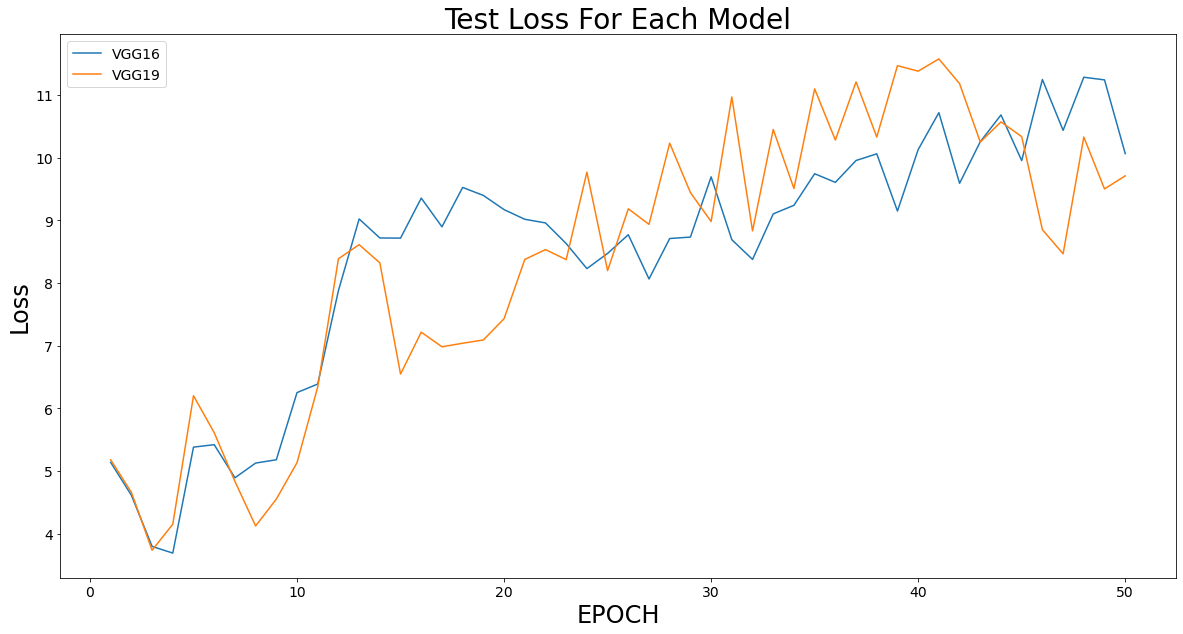

In [50]:
## Create the plot for the test loss 
test_df = concatenated[["EPOCH", "Model","Test_Loss"]]
test_df = test_df.pivot(index='EPOCH', columns='Model', values='Test_Loss')
test_df.plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("EPOCH", fontsize=24)
plt.ylabel("Loss", fontsize=24)
plt.legend(loc=2, prop={'size': 14})
plt.title("Test Loss For Each Model", fontsize=28)
plt.savefig('Project3_Final_Graphs/test_loss_all.jpg', dpi=300, bbox_inches='tight') 
plt.savefig('Project3_Final_Graphs/test_loss_all.pdf', dpi=300, bbox_inches='tight') 

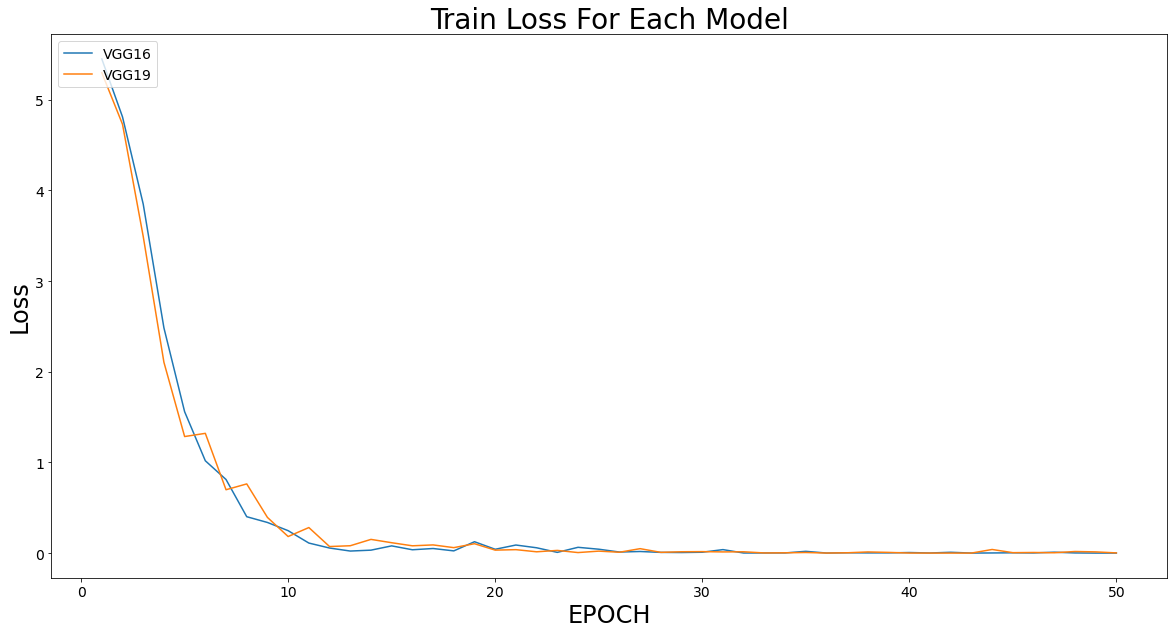

In [51]:
## Create the plot for the training loss 
train_df = concatenated[["EPOCH", "Model","Train_Loss"]]
train_df = train_df.pivot(index='EPOCH', columns='Model', values='Train_Loss')
train_df.plot()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("EPOCH", fontsize=24)
plt.ylabel("Loss", fontsize=24)
plt.legend(loc=2, prop={'size': 14})
plt.title("Train Loss For Each Model", fontsize=28)
plt.savefig('Project3_Final_Graphs/train_loss_all.jpg', dpi=300, bbox_inches='tight') 
plt.savefig('Project3_Final_Graphs/train_loss_all.pdf', dpi=300, bbox_inches='tight') 